In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_AG_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0.0,0.0,0.0,2,2.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,2.0,0
1,1,1,2,0,0,0.0,3.0,0.0,3,0.0,...,0.0,0,0.0,0,0.0,2.0,2.0,2,0.0,7
2,2,2,1,0,0,0.0,3.0,0.0,2,0.0,...,0.0,0,0.0,2,0.0,3.0,3.0,2,0.0,7
3,2,2,2,1,0,0.0,2.0,0.0,2,2.0,...,0.0,0,0.0,2,0.0,2.0,2.0,2,0.0,7
4,2,2,1,0,0,0.0,2.0,0.0,2,0.0,...,0.0,0,0.0,3,0.0,2.0,2.0,2,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,3,0.0,0.0,0.0,3,0.0,70
354,2,3,2,0,0,0.0,0.0,0.0,3,2.0,...,0.0,0,0.0,0,0.0,0.0,0.0,1,0.0,70
355,2,2,2,1,0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,2,0.0,0.0,0.0,2,0.0,70
356,2,1,0,3,0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,1,0.0,70


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
int64		column 4	0
int64		column 5	0
float64		column 6	3
float64		column 7	3
float64		column 8	9
int64		column 9	0
float64		column 10	3
int64		column 11	0
float64		column 12	12
int64		column 13	0
int64		column 14	0
int64		column 15	0
int64		column 16	0
int64		column 17	0
int64		column 18	0
int64		column 19	0
int64		column 20	0
int64		column 21	0
float64		column 22	12
int64		column 23	0
int64		column 24	0
float64		column 25	9
int64		column 26	0
float64		column 27	9
int64		column 28	0
float64		column 29	12
float64		column 30	3
float64		column 31	9
int64		column 32	0
float64		column 33	12
int64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,358.000000,358.000000,358.000000,358.000000,358.000000,355.000000,355.000000,349.000000,358.000000,355.000000,...,349.000000,358.000000,349.000000,358.000000,346.000000,355.000000,349.000000,358.000000,346.000000,358.000000
mean,2.078212,1.807263,1.569832,1.354749,0.636872,0.453521,0.171831,0.381089,0.622905,0.535211,...,0.395415,0.474860,0.458453,0.949721,0.459538,0.107042,0.117479,1.877095,0.557803,36.296089
std,0.664865,0.701541,0.900909,1.135062,0.908709,0.959613,0.578617,0.834451,0.990278,0.914895,...,0.850005,0.871705,0.956898,1.129060,0.959972,0.457000,0.497648,0.699324,1.107738,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

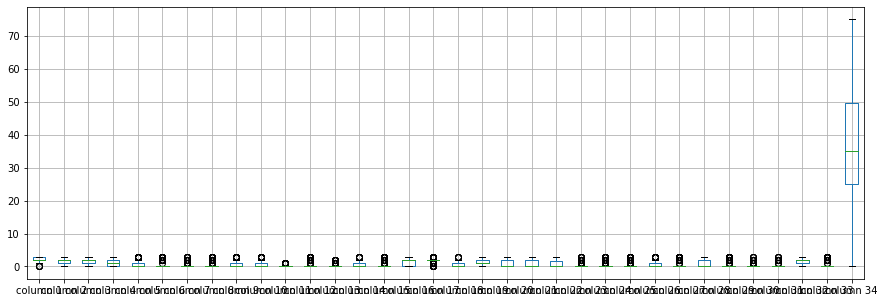

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.078212
column 2      1.807263
column 3      1.569832
column 4      1.354749
column 5      0.636872
column 6      0.453521
column 7      0.171831
column 8      0.381089
column 9      0.622905
column 10     0.535211
column 11     0.122905
column 12     0.416185
column 13     0.142458
column 14     0.547486
column 15     0.315642
column 16     1.368715
column 17     1.955307
column 18     0.511173
column 19     1.287709
column 20     0.662011
column 21     0.983240
column 22     0.647399
column 23     0.298883
column 24     0.368715
column 25     0.395415
column 26     0.474860
column 27     0.458453
column 28     0.949721
column 29     0.459538
column 30     0.107042
column 31     0.117479
column 32     1.877095
column 33     0.557803
column 34    36.296089
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.027784,-0.114671,-0.032255,0.138519,0.180429,...,-0.016562,0.153229,0.000360,0.038837,-0.008746,-0.008264,0.007121,0.093026,-0.009738,-0.005028
column 2,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.078078,-0.099409,-0.081776,0.294258,0.294151,...,-0.078625,0.205046,-0.103707,0.023095,-0.112203,-0.015132,-0.012229,-0.008453,-0.126386,0.016006
column 3,0.248062,0.347106,1.000000,-0.058534,0.239778,0.322099,-0.175753,0.281560,0.301187,0.260091,...,0.287628,0.350007,0.293875,-0.252643,0.268352,-0.092431,-0.131148,0.124812,0.277759,0.138493
column 4,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.411434,-0.146948,0.354377,-0.296824,-0.156130,...,0.371841,-0.190548,0.372608,0.003028,0.380330,-0.178660,-0.188147,0.051553,0.388078,0.048053
column 5,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.387888,-0.176862,0.390701,-0.065438,0.011885,...,0.401270,0.002588,0.372635,0.006726,0.377659,-0.151286,-0.164999,0.110295,0.379042,0.081162
column 6,0.027784,-0.078078,0.322099,0.411434,0.387888,1.000000,-0.139442,0.859583,-0.282086,-0.261168,...,0.899272,-0.123395,0.924530,0.094296,0.907206,-0.099192,-0.112039,0.259730,0.912882,0.094771
column 7,-0.114671,-0.099409,-0.175753,-0.146948,-0.176862,-0.139442,1.000000,-0.130102,0.226159,-0.000961,...,-0.117557,-0.160800,-0.139293,-0.014781,-0.137026,0.784878,0.863007,-0.093116,-0.139526,-0.370793
column 8,-0.032255,-0.081776,0.281560,0.354377,0.390701,0.859583,-0.130102,1.000000,-0.289509,-0.269006,...,0.884294,-0.109734,0.885840,0.119757,0.872822,-0.085654,-0.108120,0.277217,0.888721,0.110811
column 9,0.138519,0.294258,0.301187,-0.296824,-0.065438,-0.282086,0.226159,-0.289509,1.000000,0.658232,...,-0.266879,0.480594,-0.281355,-0.417851,-0.282860,0.236822,0.247696,-0.079246,-0.284962,-0.078267
column 10,0.180429,0.294151,0.260091,-0.156130,0.011885,-0.261168,-0.000961,-0.269006,0.658232,1.000000,...,-0.261748,0.485808,-0.257956,-0.425819,-0.262839,-0.055029,-0.032021,0.028798,-0.259504,0.033135


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+13,34+13+13,34+13+13+13,34+13+13+13+13,34+13+13+13+13+13,34+13+13+13+13+13+13,34+13+13+13+13+13+13+13,34+13+13+13+13+13+13,34+13+13+13+13+13,34+13+13+13+13,34+13+13+13,34+13+13,34+13,34], vae_layer = False, seed = 13)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 76.8783257224343
Epoch: 1 , loss: 76.44565720991655
Epoch: 2 , loss: 76.31322028420188
Epoch: 3 , loss: 76.15739128806375
Epoch: 4 , loss: 76.22804988514294
Epoch: 5 , loss: 75.79136588356711
Epoch: 6 , loss: 76.11716183749112
Epoch: 7 , loss: 75.84933749112216
Epoch: 8 , loss: 75.4158751747825
Epoch: 9 , loss: 74.47069757634944
Epoch: 10 , loss: 71.7794355912642
Epoch: 11 , loss: 69.19891045310281
Epoch: 12 , loss: 68.47113297202371
Epoch: 13 , loss: 67.3299446105957
Epoch: 14 , loss: 66.9504938992587
Epoch: 15 , loss: 67.01570892333984
Epoch: 16 , loss: 66.56034885753284
Epoch: 17 , loss: 66.24834979664196
Epoch: 18 , loss: 65.81967492537065
Epoch: 19 , loss: 65.94178165089001
Epoch: 20 , loss: 65.6768816167658
Epoch: 21 , loss: 65.40154959938742
Epoch: 22 , loss: 65.12988246570934
Epoch: 23 , loss: 65.18914465470748
Epoch: 24 , loss: 64.92940070412375
Epoch: 25 , loss: 65.1508565382524
Epoch: 26 , l

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.216109
column 9      3.000000
column 10     2.000000
column 11     0.000000
column 12     0.231083
column 13     0.000000
column 14     1.000000
column 15     0.000000
column 16     1.000000
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.371330
column 23     0.000000
column 24     0.000000
column 25     0.223309
column 26     0.000000
column 27     0.256854
column 28     0.000000
column 29     0.257852
column 30     0.000000
column 31     0.004170
column 32     1.000000
column 33     0.295780
column 34    12.000000
Name: 21, dtype: float64

In [21]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [22]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0
1,0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0
2,0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0
3,0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0
4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0
354,0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0
355,0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0
356,0,0,0,0,0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0


Calculating NRMSE Value

In [23]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [24]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [25]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(8.47885970789524, 758.0725558942231)

In [26]:
NRMS=numerator/denominator
NRMS


0.011184760141980827

In [27]:
new_df.iloc[66,:]

column 1      2.0
column 2      0.0
column 3      0.0
column 4      3.0
column 5      0.0
column 6      0.0
column 7      0.0
column 8      0.0
column 9      0.0
column 10     0.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     0.0
column 15     2.0
column 16     2.0
column 17     2.0
column 18     0.0
column 19     0.0
column 20     0.0
column 21     3.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     0.0
column 32     2.0
column 33     0.0
column 34    22.0
Name: 66, dtype: float64

In [28]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0.0,0.0,0.0,2,2.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0,2.0,0
1,1,1,2,0,0,0.0,3.0,0.0,3,0.0,...,0.0,0,0.0,0,0.0,2.0,2.0,2,0.0,7
2,2,2,1,0,0,0.0,3.0,0.0,2,0.0,...,0.0,0,0.0,2,0.0,3.0,3.0,2,0.0,7
3,2,2,2,1,0,0.0,2.0,0.0,2,2.0,...,0.0,0,0.0,2,0.0,2.0,2.0,2,0.0,7
4,2,2,1,0,0,0.0,2.0,0.0,2,0.0,...,0.0,0,0.0,3,0.0,2.0,2.0,2,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,3,0.0,0.0,0.0,3,0.0,70
354,2,3,2,0,0,0.0,0.0,0.0,3,2.0,...,0.0,0,0.0,0,0.0,0.0,0.0,1,0.0,70
355,2,2,2,1,0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,2,0.0,0.0,0.0,2,0.0,70
356,2,1,0,3,0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0,0.0,0.0,0.0,1,0.0,70


In [20]:
imputations[-1].to_excel("DERM_AG_1(imp).xlsx", index=False, header=False)